# Estimation of COVID-19 Pandemic

## Loading Data

We will use data on COVID-19 infected individuals, provided by the [Center for Systems Science and Engineering](https://systems.jhu.edu/) (CSSE) at [Johns Hopkins University](https://jhu.edu/). Dataset is available in [this GitHub Repository](https://github.com/CSSEGISandData/COVID-19).

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3) # make figures larger

We can load the most recent data directly from GitHub using `pd.read_csv`. If for some reason the data is not available, you can always use the copy available locally in the `data` folder - just uncomment the line below that defines `base_url`:

In [88]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" # loading from Internet
# base_url = "../../data/COVID/" # loading from disk
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"

Let's now load the data for infected individuals and see how the data looks like:

In [89]:
infected = pd.read_csv(infected_dataset_url)
infected.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


We can see that each row of the table defines the number of infected individuals for each country and/or province, and columns correspond to dates. Similar tables can be loaded for other data, such as number of recovered and number of deaths.

In [90]:
recovered = pd.read_csv(recovered_dataset_url)
deaths = pd.read_csv(deaths_dataset_url)

## Making Sense of the Data

From the table above the role of province column is not clear. Let's see the different values that are present in `Province/State` column:

In [91]:
infected['Province/State'].value_counts()

Province/State
Australian Capital Territory                    1
New South Wales                                 1
Northern Territory                              1
Queensland                                      1
South Australia                                 1
                                               ..
Jersey                                          1
Montserrat                                      1
Pitcairn Islands                                1
Saint Helena, Ascension and Tristan da Cunha    1
Turks and Caicos Islands                        1
Name: count, Length: 91, dtype: int64

From the names we can deduce that countries like Australia and China have more detailed breakdown by provinces. Let's look for information on China to see the example:

In [92]:
infected[infected['Country/Region']=='China'].head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
59,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275
60,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,40774,40774,40774,40774,40774,40774,40774,40774,40774,40774
61,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,14715,14715,14715,14715,14715,14715,14715,14715,14715,14715
62,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,17122,17122,17122,17122,17122,17122,17122,17122,17122,17122
63,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,...,1742,1742,1742,1742,1742,1742,1742,1742,1742,1742
64,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,103248,103248,103248,103248,103248,103248,103248,103248,103248,103248
65,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,...,13371,13371,13371,13371,13371,13371,13371,13371,13371,13371
66,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,...,2534,2534,2534,2534,2534,2534,2534,2534,2534,2534
67,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,...,10483,10483,10483,10483,10483,10483,10483,10483,10483,10483
68,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,...,3292,3292,3292,3292,3292,3292,3292,3292,3292,3292


## Pre-processing the Data 

We are not interested in breaking countries down to further territories, thus we would first get rid of this breakdown and add information on all territories together, to get info for the whole country. This can be done using `groupby`:

In [93]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

infected.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,33.93911,67.709953,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,41.15330,20.168300,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,28.03390,1.659600,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,42.50630,1.521800,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,-11.20270,17.873900,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


You can see that due to using `groupby` all DataFrames are now indexed by Country/Region. We can thus access the data for a specific country by using `.loc`:|

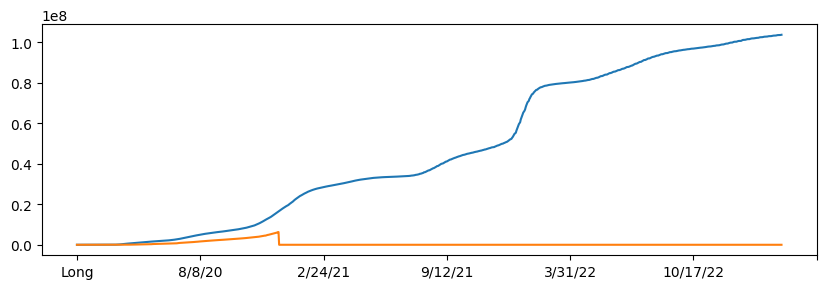

In [94]:
infected.loc['US'][2:].plot()
recovered.loc['US'][2:].plot()
plt.show()

> **Note** how we use `[2:]` to remove first two elements of a sequence that contain geolocation of a country. We can also drop those two columns altogether:

In [95]:
infected.drop(columns=['Lat','Long'],inplace=True)
recovered.drop(columns=['Lat','Long'],inplace=True)
deaths.drop(columns=['Lat','Long'],inplace=True)

In [96]:
recovered.loc["US"]

Province/State    0
1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
                 ..
3/5/23            0
3/6/23            0
3/7/23            0
3/8/23            0
3/9/23            0
Name: US, Length: 1144, dtype: object

## Investigating the Data

Let's now switch to investigating a specific country. Let's create a frame that contains the data on infections indexed by date:

In [97]:
def mkframe(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country] ,
                        'recovered' : recovered.loc[country],
                        'deaths' : deaths.loc[country]})
    df.index = pd.to_datetime(df.index, format='%m/%d/%y',errors = "coerce")
    return df

df = mkframe('US')
df

,infected,recovered,deaths
NaT,0,0,0
2020-01-22,1,0,0
2020-01-23,1,0,0
2020-01-24,2,0,0
2020-01-25,2,0,0
...,...,...,...
2023-03-05,103646975,0,1122134
2023-03-06,103655539,0,1122181
2023-03-07,103690910,0,1122516
2023-03-08,103755771,0,1123246


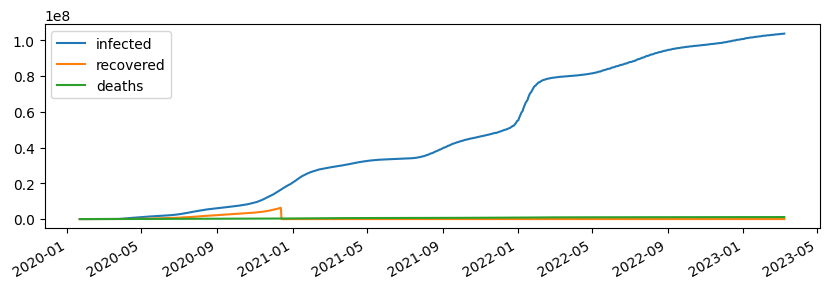

In [98]:
df.plot()
plt.show()

Now let's compute the number of new infected people each day. This will allow us to see the speed at which pandemic progresses. The easiest day to do it is to use `diff`:

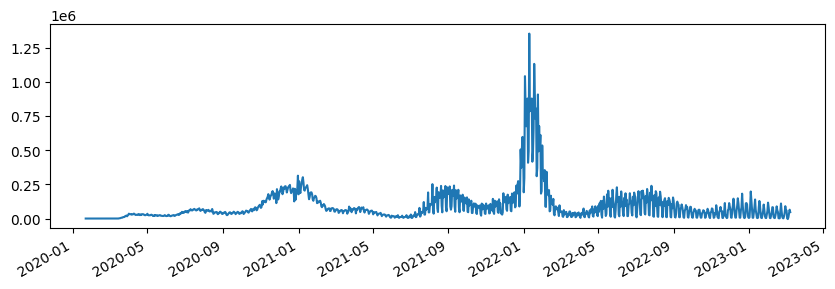

In [99]:
df['ninfected'] = df['infected'].diff()
df['ninfected'].plot()
plt.show()

We can see high fluctuations in data. Let's look closer at one of the months:

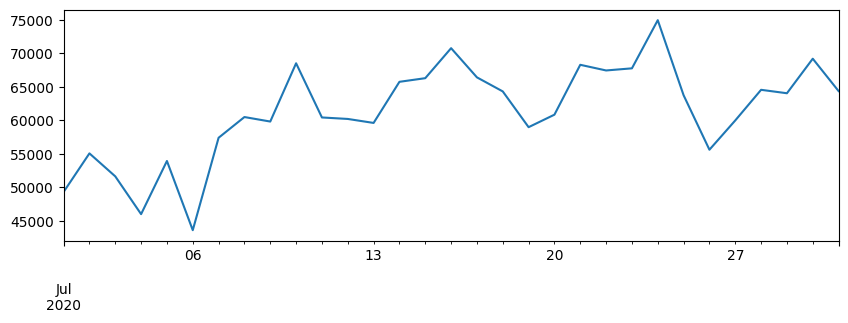

In [100]:
df[(df.index.year==2020) & (df.index.month==7)]['ninfected'].plot()
plt.show()

It clearly looks like there are weekly fluctuations in data. Because we want to be able to see the trends, it makes sense to smooth out the curve by computing running average (i.e. for each day we will compute the average value of the previous several days):

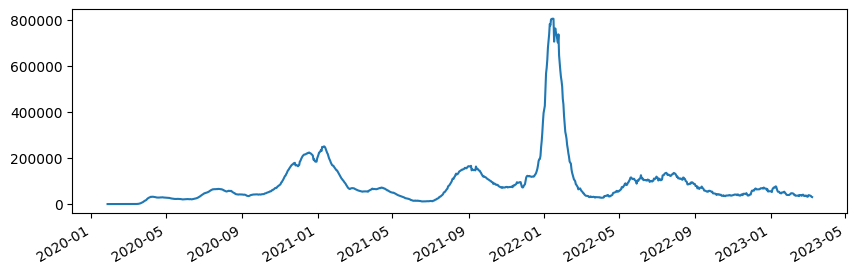

In [101]:
df['ninfav'] = df['ninfected'].rolling(window=7).mean()
df['ninfav'].plot()
plt.show()

In order to be able to compare several countries, we might want to take the country's population into account, and compare the percentage of infected individuals with respect to country's population. In order to get country's population, let's load the dataset of countries:

In [102]:
countries = pd.read_csv(countries_dataset_url)
countries

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.939110,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.153300,20.168300,Albania,2877800.0
2,10,AQ,ATA,10.0,NaN,NaN,NaN,Antarctica,-71.949900,23.347000,Antarctica,NaN
3,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.033900,1.659600,Algeria,43851043.0
4,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.506300,1.521800,Andorra,77265.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4316,84056037,US,USA,840.0,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,"Sweetwater, Wyoming, US",42343.0
4317,84056039,US,USA,840.0,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",23464.0
4318,84056041,US,USA,840.0,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",20226.0
4319,84056043,US,USA,840.0,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",7805.0


Because this dataset contains information on both countries and provinces, to get the population of the whole country we need to be a little bit clever: 

In [103]:
countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
915,840,US,USA,840.0,NaN,NaN,NaN,US,40.0,-100.0,US,329466283.0


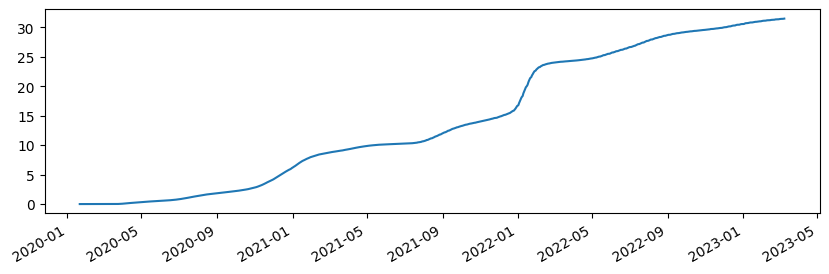

In [104]:
pop = countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]['Population'].iloc[0]
df['pinfected'] = df['infected']*100 / pop
df['pinfected'].plot(figsize=(10,3))
plt.show()


## Computing $R_t$

To see how infectious is the disease, we look at the **basic reproduction number** $R_0$, which indicated the number of people that an infected person would further infect. When $R_0$ is more than 1, the epidemic is likely to spread.

$R_0$ is a property of the disease itself, and does not take into account some protective measures that people may take to slow down the pandemic. During the pandemic progression, we can estimate the reproduction number $R_t$ at any given time $t$. It has been shown that this number can be roughly estimated by taking a window of 8 days, and computing $$R_t=\frac{I_{t-7}+I_{t-6}+I_{t-5}+I_{t-4}}{I_{t-3}+I_{t-2}+I_{t-1}+I_t}$$
where $I_t$ is the number of newly infected individuals on day $t$.

Let's compute $R_t$ for our pandemic data. To do this, we will take a rolling window of 8 `ninfected` values, and apply the function to compute the ratio above:

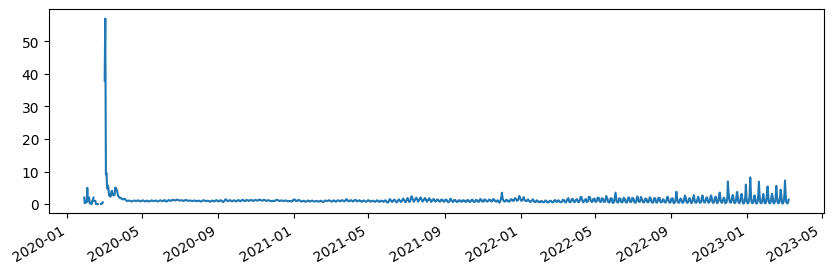

In [105]:
df['Rt'] = df['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
df['Rt'].plot()
plt.show()

You can see that there are some gaps in the graph. Those can be caused by either `NaN`, if  `inf` values being present in the dataset. `inf` may be caused by division by 0, and `NaN` can indicate missing data, or no data available to compute the result (like in the very beginning of our frame, where rolling window of width 8 is not yet available). To make the graph nicer, we need to fill those values using `replace` and `fillna` function.

Let's further look at the beginning of the pandemic. We will also limit the y-axis values to show only values below 6, in order to see better, and draw horizontal line at 1.

/tmp/ipykernel_16403/1618873019.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ax = df[df.index<"2020-05-01"]['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3))


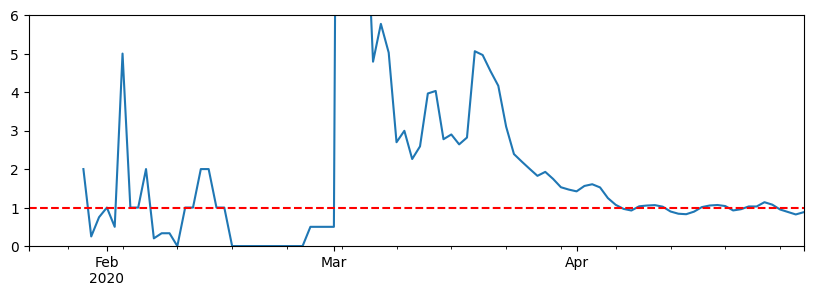

In [106]:
ax = df[df.index<"2020-05-01"]['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3))
ax.set_ylim([0,6])
ax.axhline(1,linestyle='--',color='red')
plt.show()

Another interesting indicator of the pandemic is the **derivative**, or **daily difference** in new cases. It allows us to see clearly when pandemic is increasing or declining. 

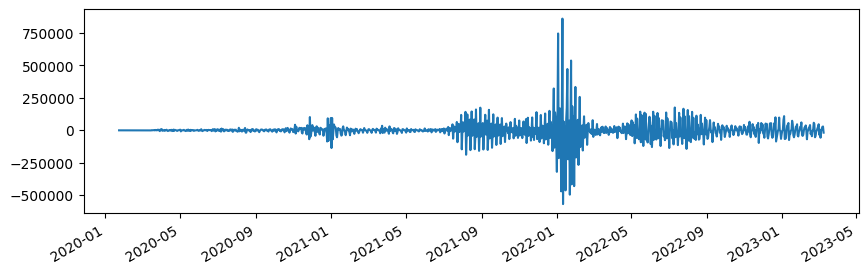

In [107]:
df['ninfected'].diff().plot()
plt.show()

Given the fact that there are a lot of fluctuations in data caused by reporting, it makes sense to smooth the curve by running rolling average to get the overall picture. Let's again focus on the first months of the pandemic:

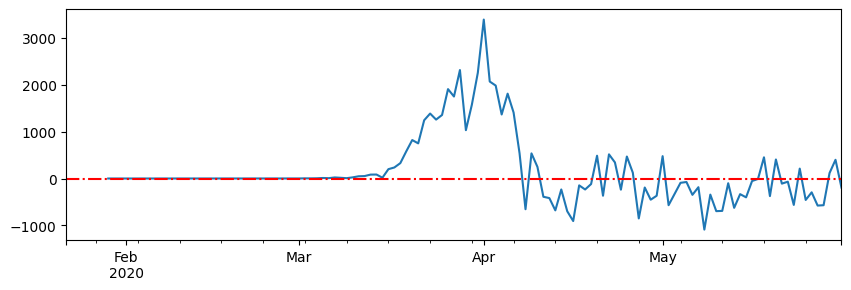

In [108]:
ax=df[df.index<"2020-06-01"]['ninfected'].diff().rolling(7).mean().plot()
ax.axhline(0,linestyle='-.',color='red')
plt.show()


## Challenge

Now it is time for you to play more with the code and data! Here are a few suggestions you can experiment with:
* See the spread of the pandemic in different countries.
* Plot $R_t$ graphs for several countries on one plot for comparison, or make several plots side-by-side
* See how the number of deaths and recoveries correlate with number of infected cases.
* Try to find out how long a typical disease lasts by visually correlating infection rate and deaths rate and looking for some anomalies. You may need to look at different countries to find that out.
* Calculate the fatality rate and how it changes over time. You may want to take into account the length of the disease in days to shift one time series before doing calculations

## References

You may look at further studies of COVID epidemic spread in the following publications:
* [Sliding SIR Model for Rt Estimation during COVID Pandemic](https://soshnikov.com/science/sliding-sir-model-for-rt-estimation/), blog post by [Dmitry Soshnikov](http://soshnikov.com)
* T.Petrova, D.Soshnikov, A.Grunin. [Estimation of Time-Dependent Reproduction Number for Global COVID-19 Outbreak](https://www.preprints.org/manuscript/202006.0289/v1). *Preprints* **2020**, 2020060289 (doi: 10.20944/preprints202006.0289.v1)
* [Code for the above paper on GitHub](https://github.com/shwars/SlidingSIR)

# Observing the Spread of the Pandemic in different countries
Here, we will analyze covid spread in 6 countries, namely **Philippines**, **India**, **China**, **Italy**, **South Korea**, and **Japan**.

In [109]:
infected.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [110]:
def mkframe(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country] ,
                        'recovered' : recovered.loc[country],
                        'deaths' : deaths.loc[country]})
    df.index = pd.to_datetime(df.index, format='%m/%d/%y',errors = "coerce")
    return df

df = mkframe('US')
df

,infected,recovered,deaths
NaT,0,0,0
2020-01-22,1,0,0
2020-01-23,1,0,0
2020-01-24,2,0,0
2020-01-25,2,0,0
...,...,...,...
2023-03-05,103646975,0,1122134
2023-03-06,103655539,0,1122181
2023-03-07,103690910,0,1122516
2023-03-08,103755771,0,1123246


Countries to analyze: ['Philippines', 'India', 'Russia', 'Italy', 'Korea, South', 'Japan']


/tmp/ipykernel_16403/202162943.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ax = df[df.index<"2020-05-01"]['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3))


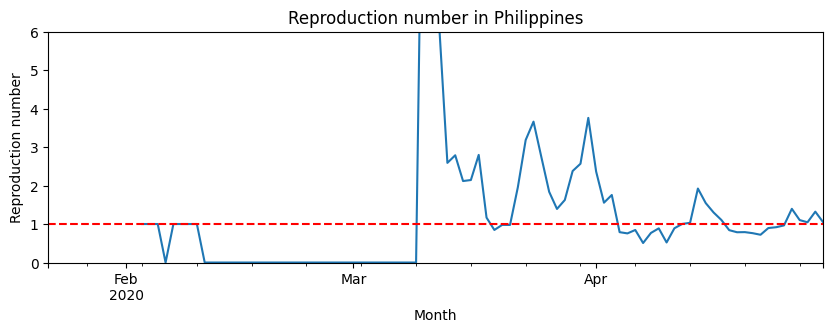

/tmp/ipykernel_16403/202162943.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ax = df[df.index<"2020-05-01"]['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3))


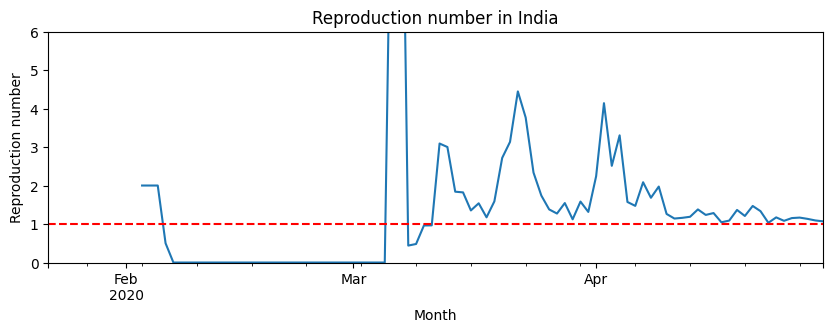

/tmp/ipykernel_16403/202162943.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ax = df[df.index<"2020-05-01"]['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3))


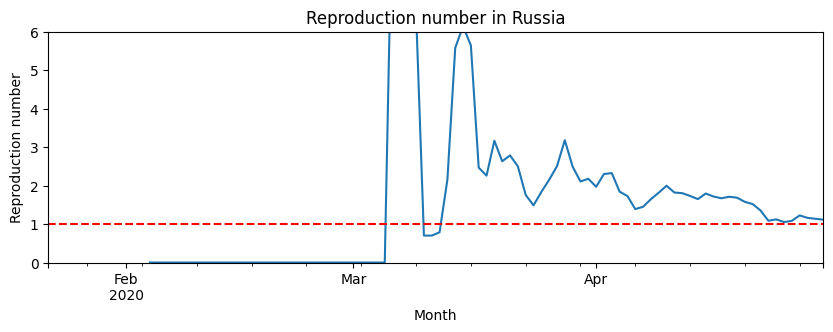

/tmp/ipykernel_16403/202162943.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ax = df[df.index<"2020-05-01"]['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3))


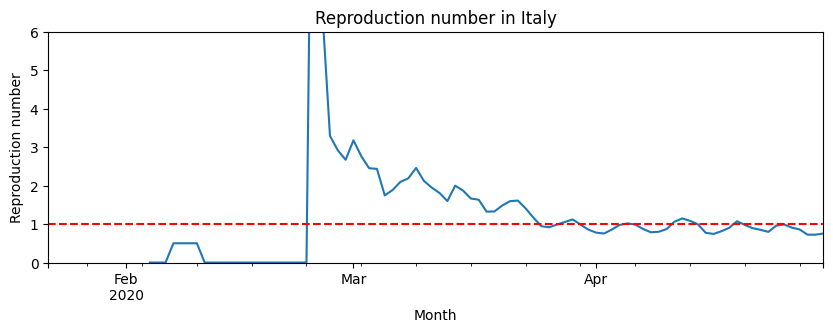

/tmp/ipykernel_16403/202162943.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ax = df[df.index<"2020-05-01"]['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3))


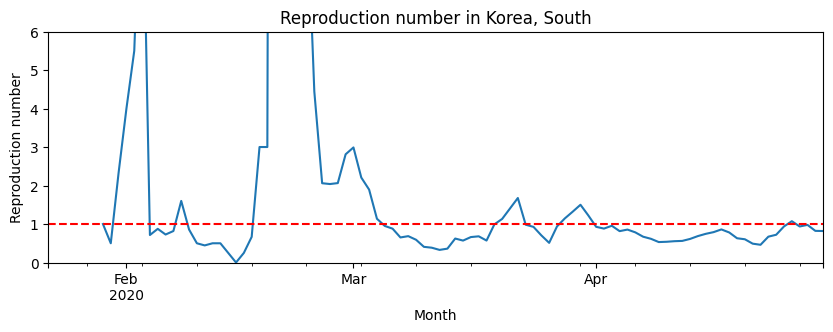

/tmp/ipykernel_16403/202162943.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ax = df[df.index<"2020-05-01"]['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3))


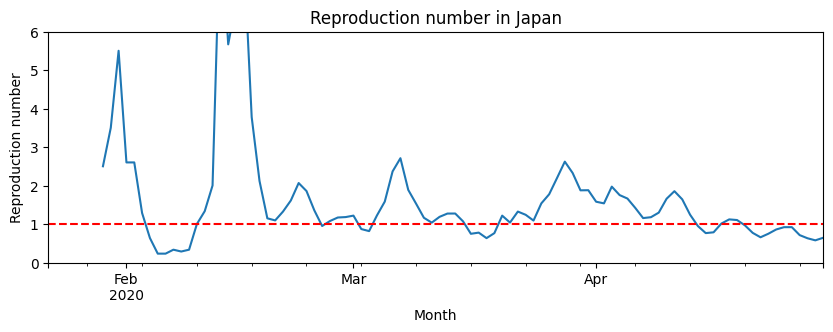

In [111]:
analyze_countries = ["Philippines", "India", "Russia", "Italy", "Korea, South", "Japan"]
print("Countries to analyze:", analyze_countries)
for country in analyze_countries:
    df = mkframe(country)
    df['ninfected'] = df['infected'].diff()
    df['Rt'] = df['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
    ax = df[df.index<"2020-05-01"]['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3))
    ax.set_ylim([0,6])
    ax.axhline(1,linestyle='--',color='red')
    plt.title("Reproduction number in "+country)
    plt.xlabel("Month")
    plt.ylabel("Reproduction number")

    plt.show()

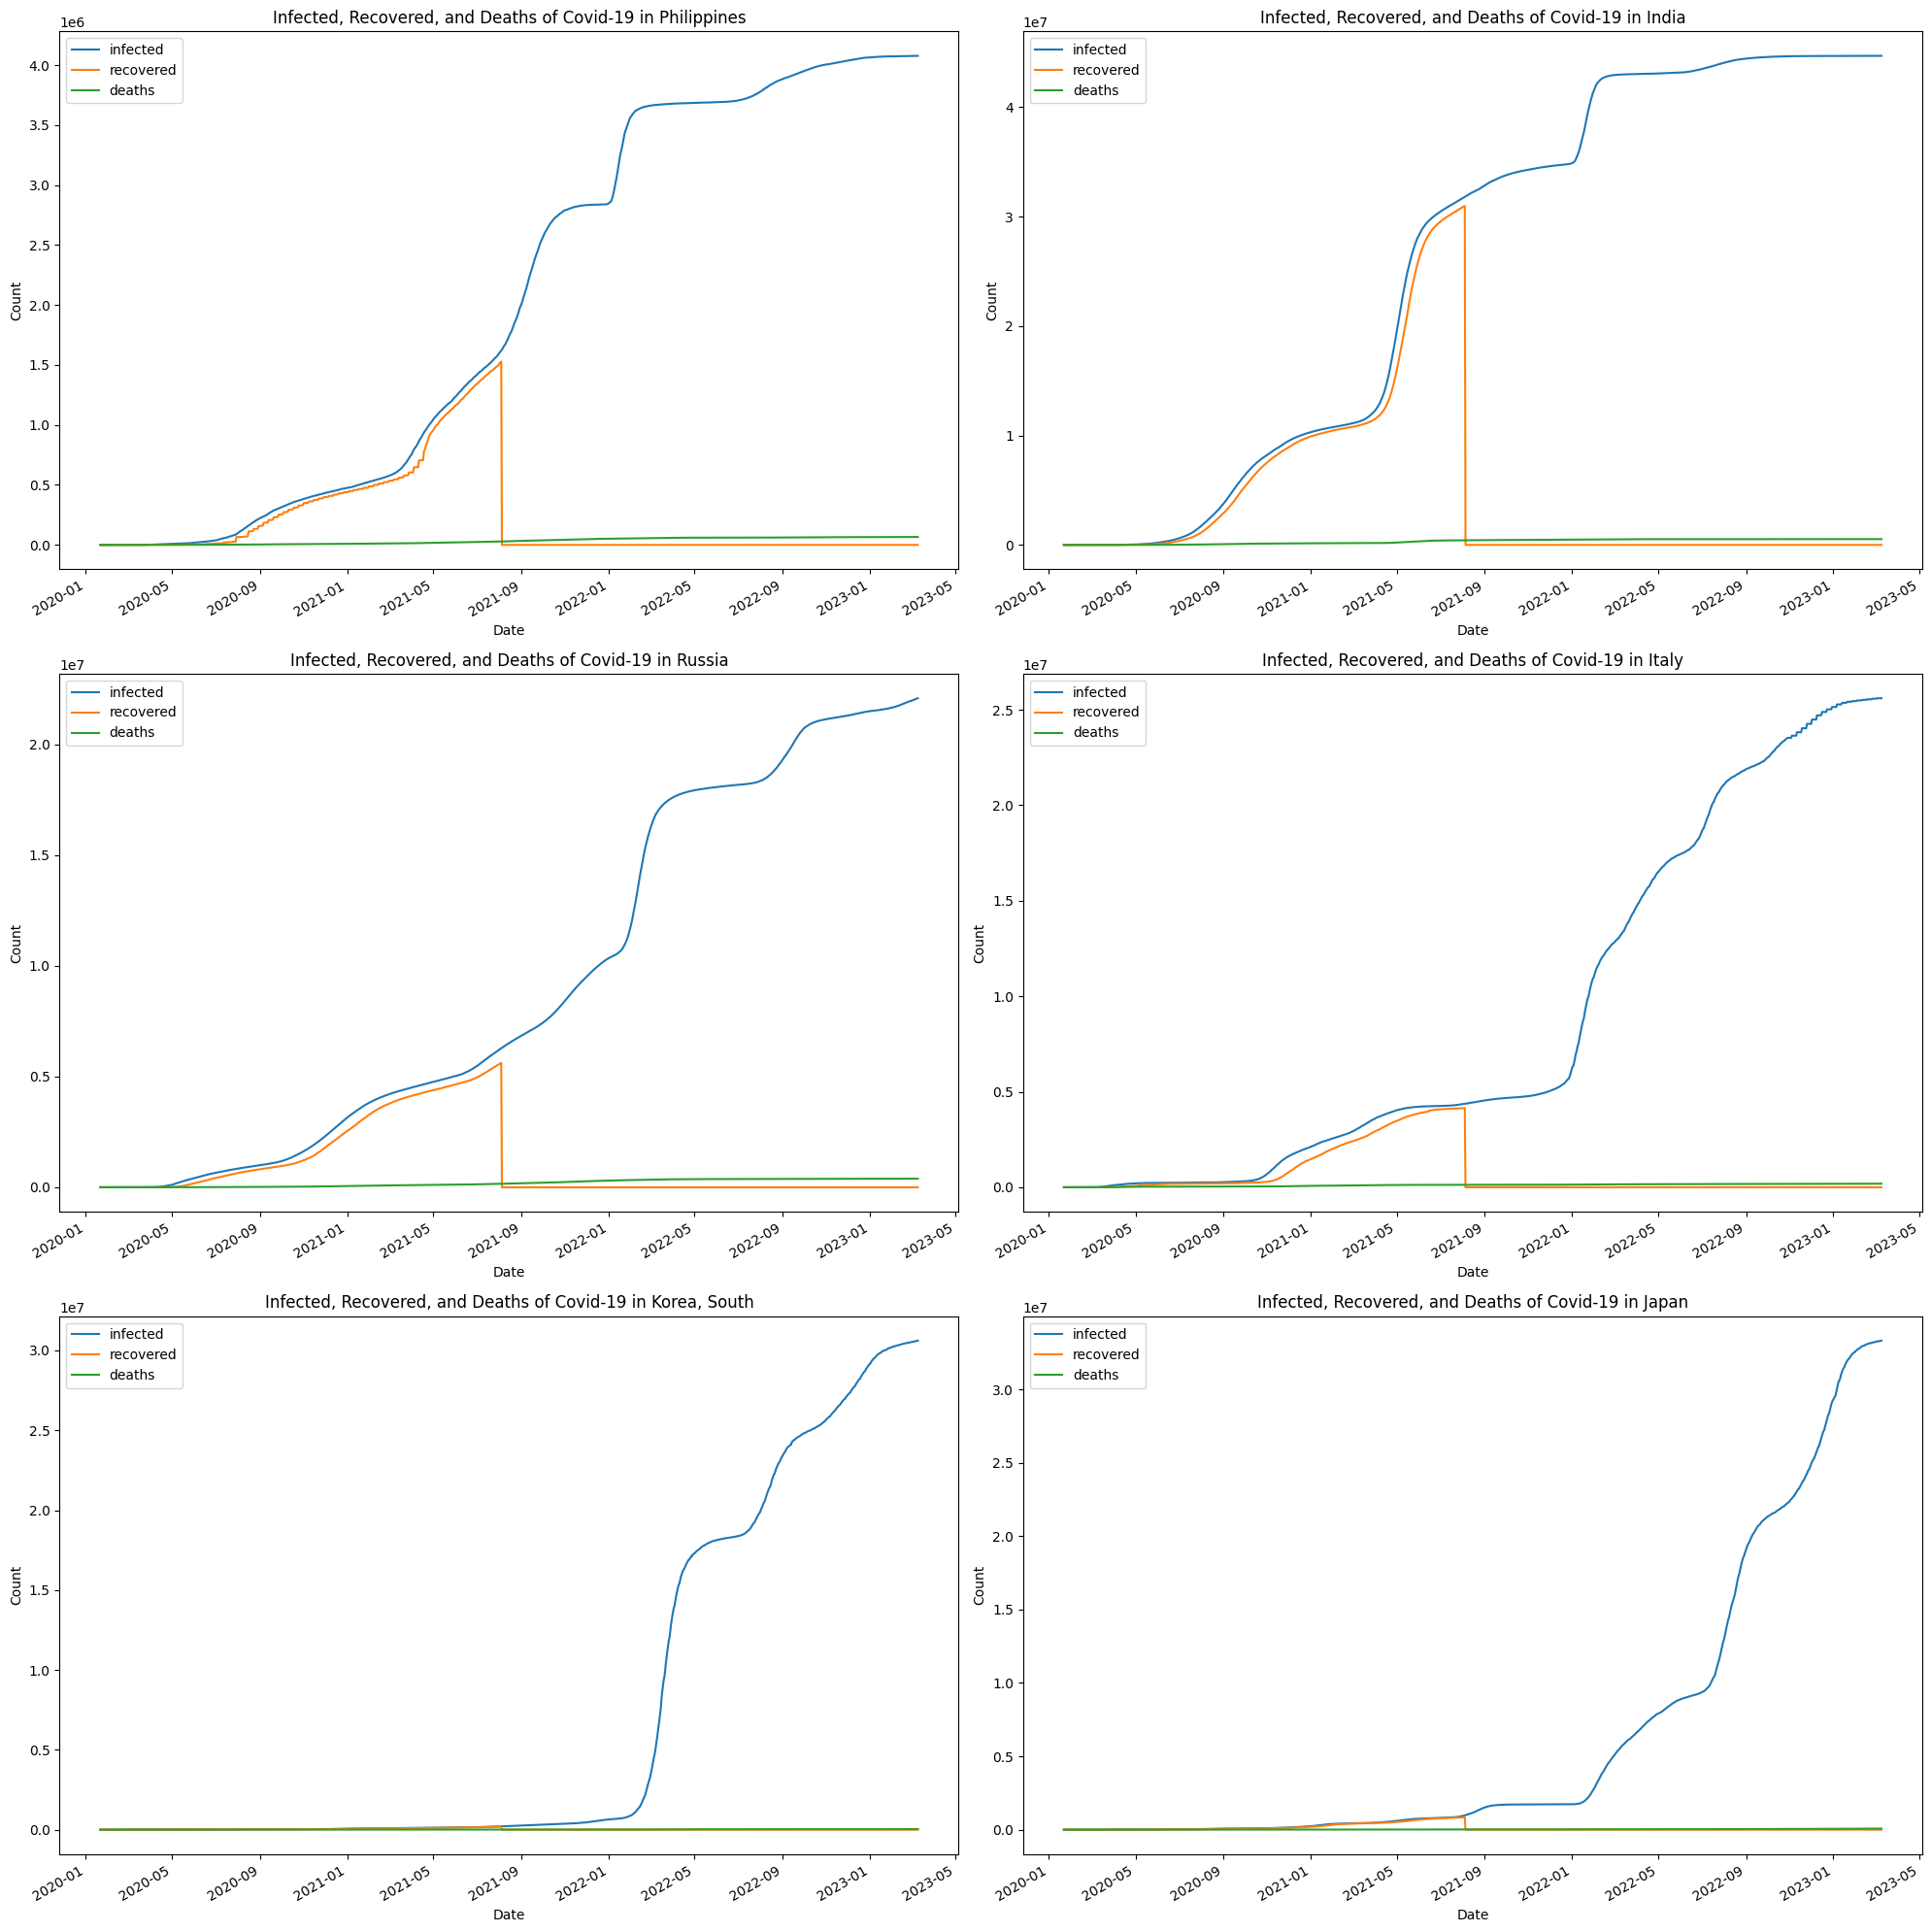

In [112]:
fig, axs = plt.subplots(3, 2, figsize = (20,20))
for country in analyze_countries:
    df = mkframe(country)
    row = analyze_countries.index(country) // 2
    col = analyze_countries.index(country) % 2
    ax = axs[row, col]
    df.plot(ax=ax)
    ax.set_title(f"Infected, Recovered, and Deaths of Covid-19 in {country}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

## Relationship between number of Infected to the number of Recovered and Death

From the graph, we can observe that the deaths follows an almost horizontal line. This is due to the scale of the y-axis being affected by the number of the infected. It shows that there is a huge difference between the number of deaths and the infected, leaving the plot of the number of deaths basically useless in determining the relationship between the two. Nevertheless, we can see that, at least, for the countries South Korea, Japan, and Russia,the number of those infected spiked when the number of those who recovered showed a decline.

Graph of infected vs. recovered data from the 6 countries and their respective correlation
Correlation for Philippines: -0.34364097669551025
Correlation for India: -0.15991442913802678
Correlation for Russia: -0.3800006340779427
Correlation for Italy: -0.31171778849439463
Correlation for Korea, South: -0.37340772595720256
Correlation for Japan: -0.3071647440301201


[]

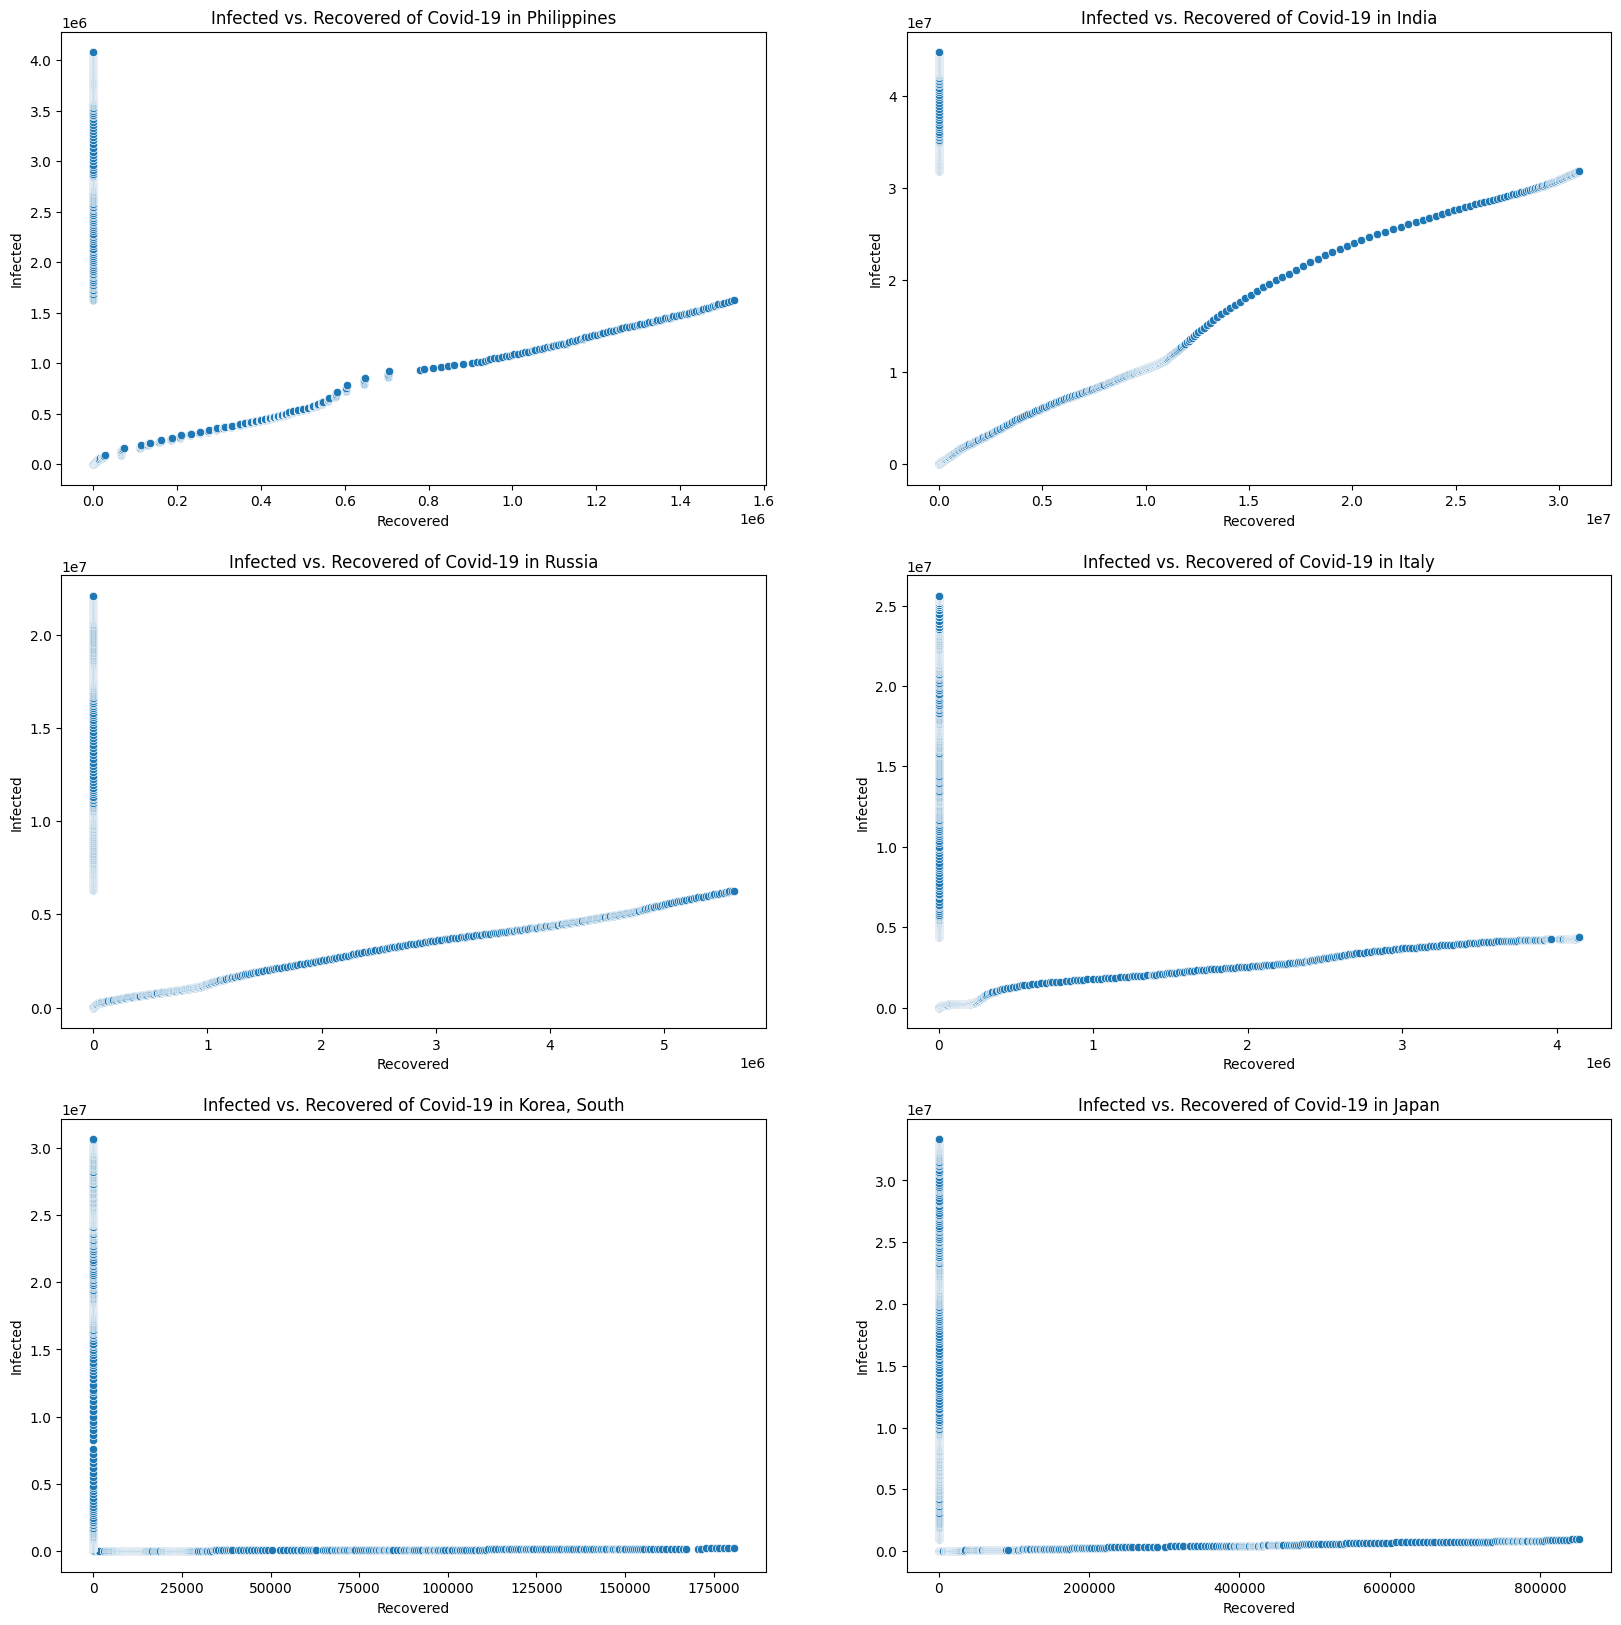

In [113]:
import seaborn as sns
fig, axs = plt.subplots(3, 2, figsize = (20,20))
print("Graph of infected vs. recovered data from the 6 countries and their respective correlation")
for country in analyze_countries:
    df = mkframe(country)
    ax = axs[analyze_countries.index(country) // 2, analyze_countries.index(country) % 2]
    sns.scatterplot(data=df, x="recovered", y="infected", ax = ax)
    
    ax.set_title(f"Infected vs. Recovered of Covid-19 in {country}")
    ax.set_xlabel("Recovered")
    ax.set_ylabel("Infected")
    print(f"Correlation for {country}: {df['infected'].corr(df['recovered'])}")

plt.plot()

We can see that although some countries show a positive trend, the correlation coefficient shows a negative value for all the countries, which is counterintuitive. The reason for this is because of the vertical line when the number of recovery is approximately, where the number of infected drastically rise.
This is also backed up by the plot of each country addressing the number of infected, recovered, and death.

## Relationship between number of Infected to the number of Recovered and Death

Let's now look at the relationship between the number of infected and the number of deaths. 

Graph of deaths vs. infected data from the 6 countries and their respective correlation
Correlation for Philippines: 0.9982901120480638
Correlation for India: 0.995589736779807
Correlation for Russia: 0.9760514743370531
Correlation for Italy: 0.8569194789668102
Correlation for Korea, South: 0.9919845279790087
Correlation for Japan: 0.954939437687826


[]

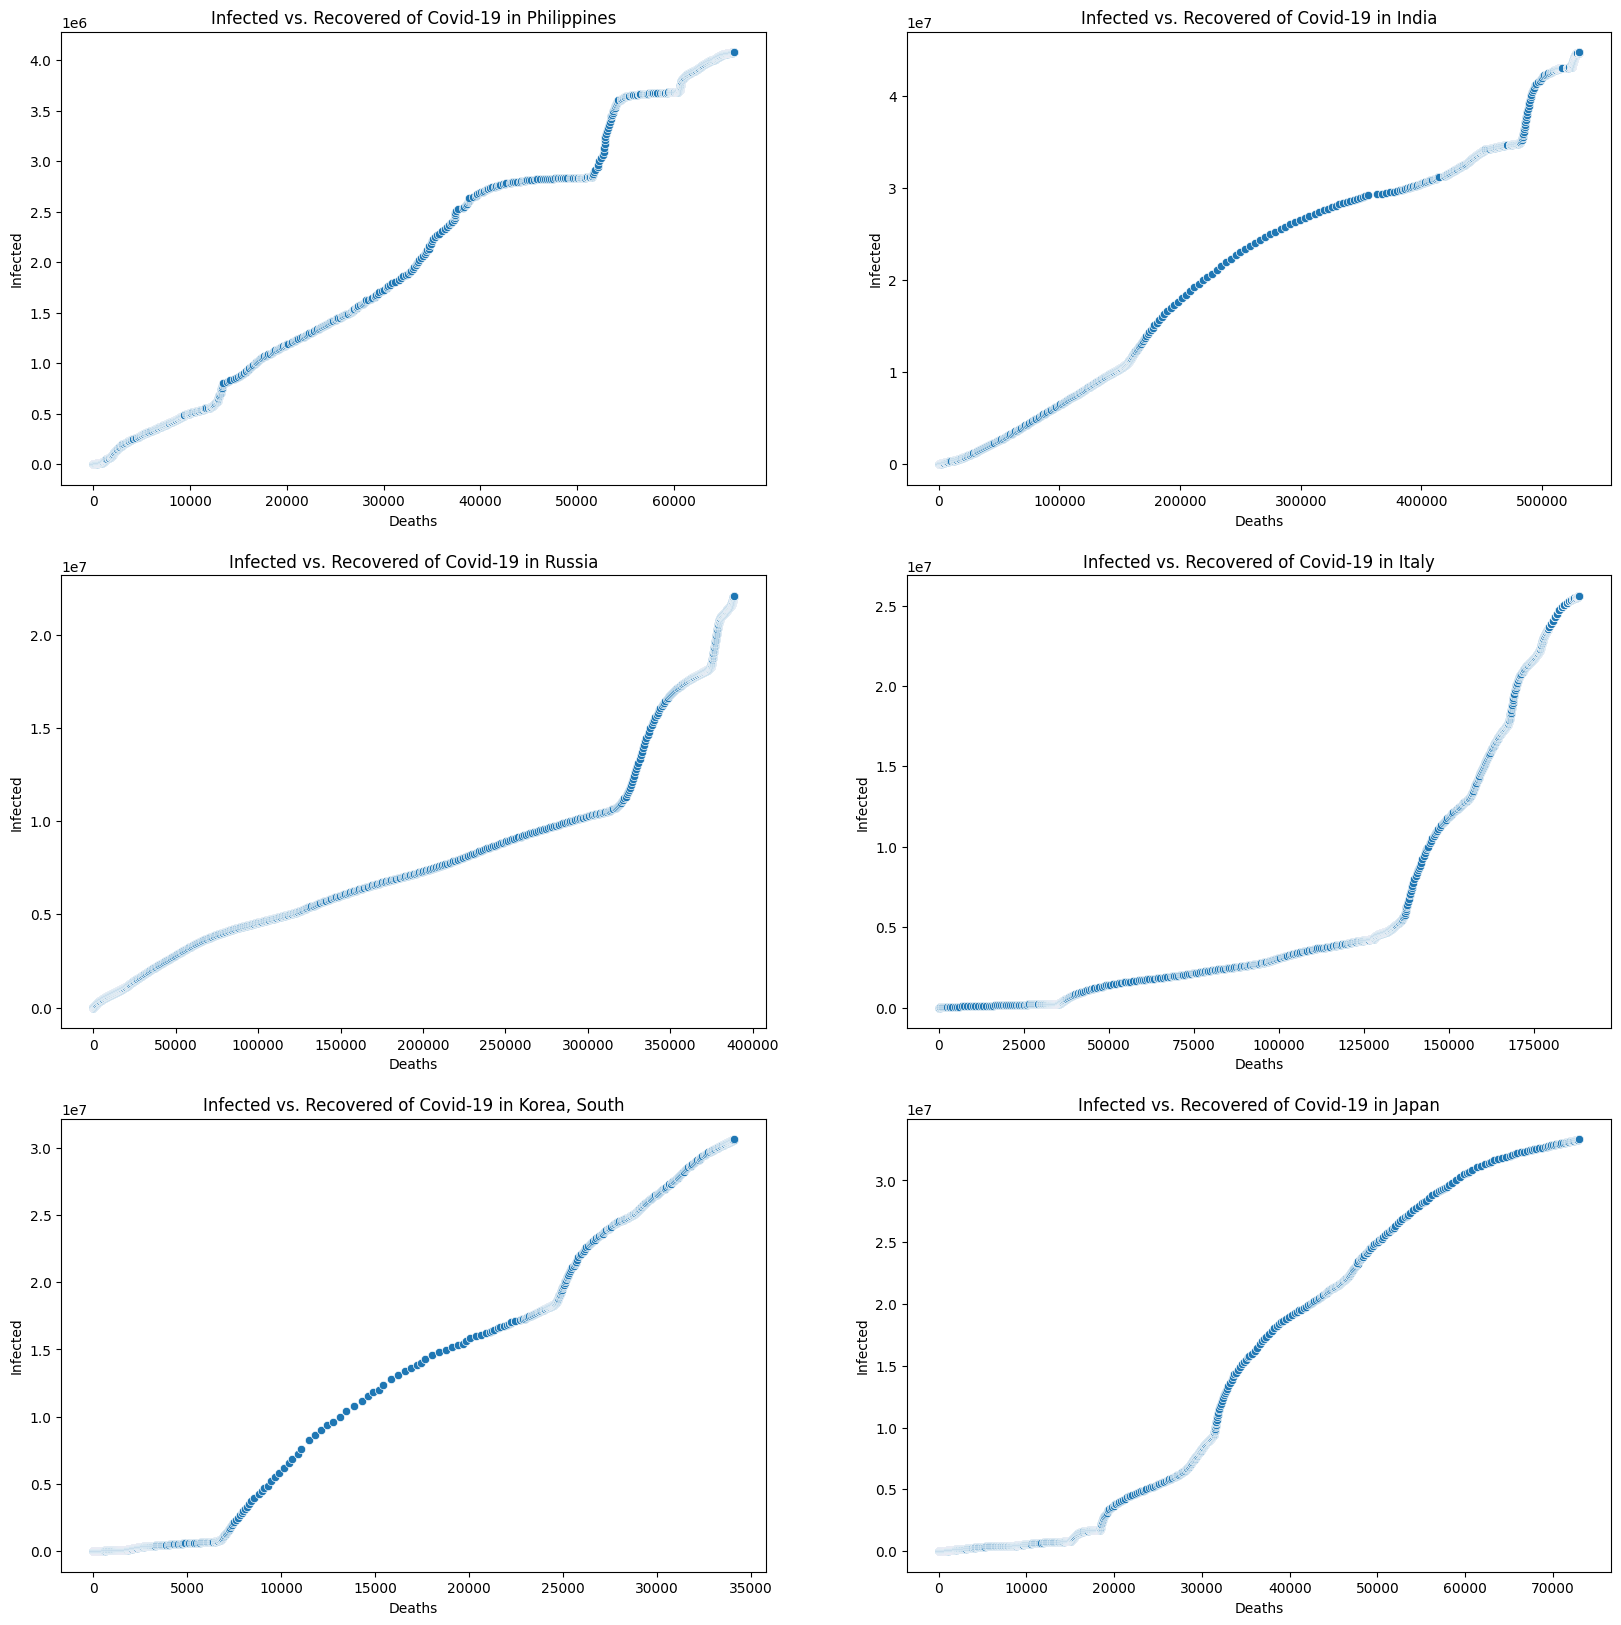

In [114]:
fig, axs = plt.subplots(3, 2, figsize = (20,20))
print("Graph of deaths vs. infected data from the 6 countries and their respective correlation")
for country in analyze_countries:
    df = mkframe(country)
    ax = axs[analyze_countries.index(country) // 2, analyze_countries.index(country) % 2]
    sns.scatterplot(data=df, x="deaths", y="infected", ax = ax)
    
    ax.set_title(f"Infected vs. Recovered of Covid-19 in {country}")
    ax.set_xlabel("Deaths")
    ax.set_ylabel("Infected")
    print(f"Correlation for {country}: {df['infected'].corr(df['deaths'])}")

plt.plot()

We can see that all of the countries show a positive trend between the relationship of number of deaths and number of infected. They show a very strong positive correlation. This is because, as we look at the graphs of the number of infected, deaths, and recovered for each country, we can see a rise of infection as time passes by; we can also see a rise to the number of deaths as time passes by. This results to a very strong positive correlation.
**_NOTE:_** Correlation doesn't imply causation, even if the correlation coefficient is strongly positive. But, in this case, it is intuitive that the number of infected people will definitely affect the number of deaths (How can you die of Covid-19 if you're not infected by it?)
### Why?
Here, we wiil tackle about the significance of the ratio of the infected to the number of population. This is because, in addition to the rate of infection of Covid-19, as long as there is enough population, the number of infected people will also rise drastically (the total number of infected model typically follows an exponential growth if response isnt adequate to contain the infection).

## Fatality Rate and How it Changes Over Time

The average duration of a covid infection is 14 days. Let's see how the fatality rate changes over time. This is done by dividing the number of deaths by the total number of infected people. We should then take account of the infection duration. This is crucial as we must use the total number of infected 14 days before the specific date of the collected number of deaths.

Graph of deaths vs. infected data from the 6 countries and their respective correlation
Correlation for Philippines: 0.9982901120480638
Correlation for India: 0.995589736779807
Correlation for Russia: 0.9760514743370531
Correlation for Italy: 0.8569194789668102
Correlation for Korea, South: 0.9919845279790087
Correlation for Japan: 0.954939437687826


[]

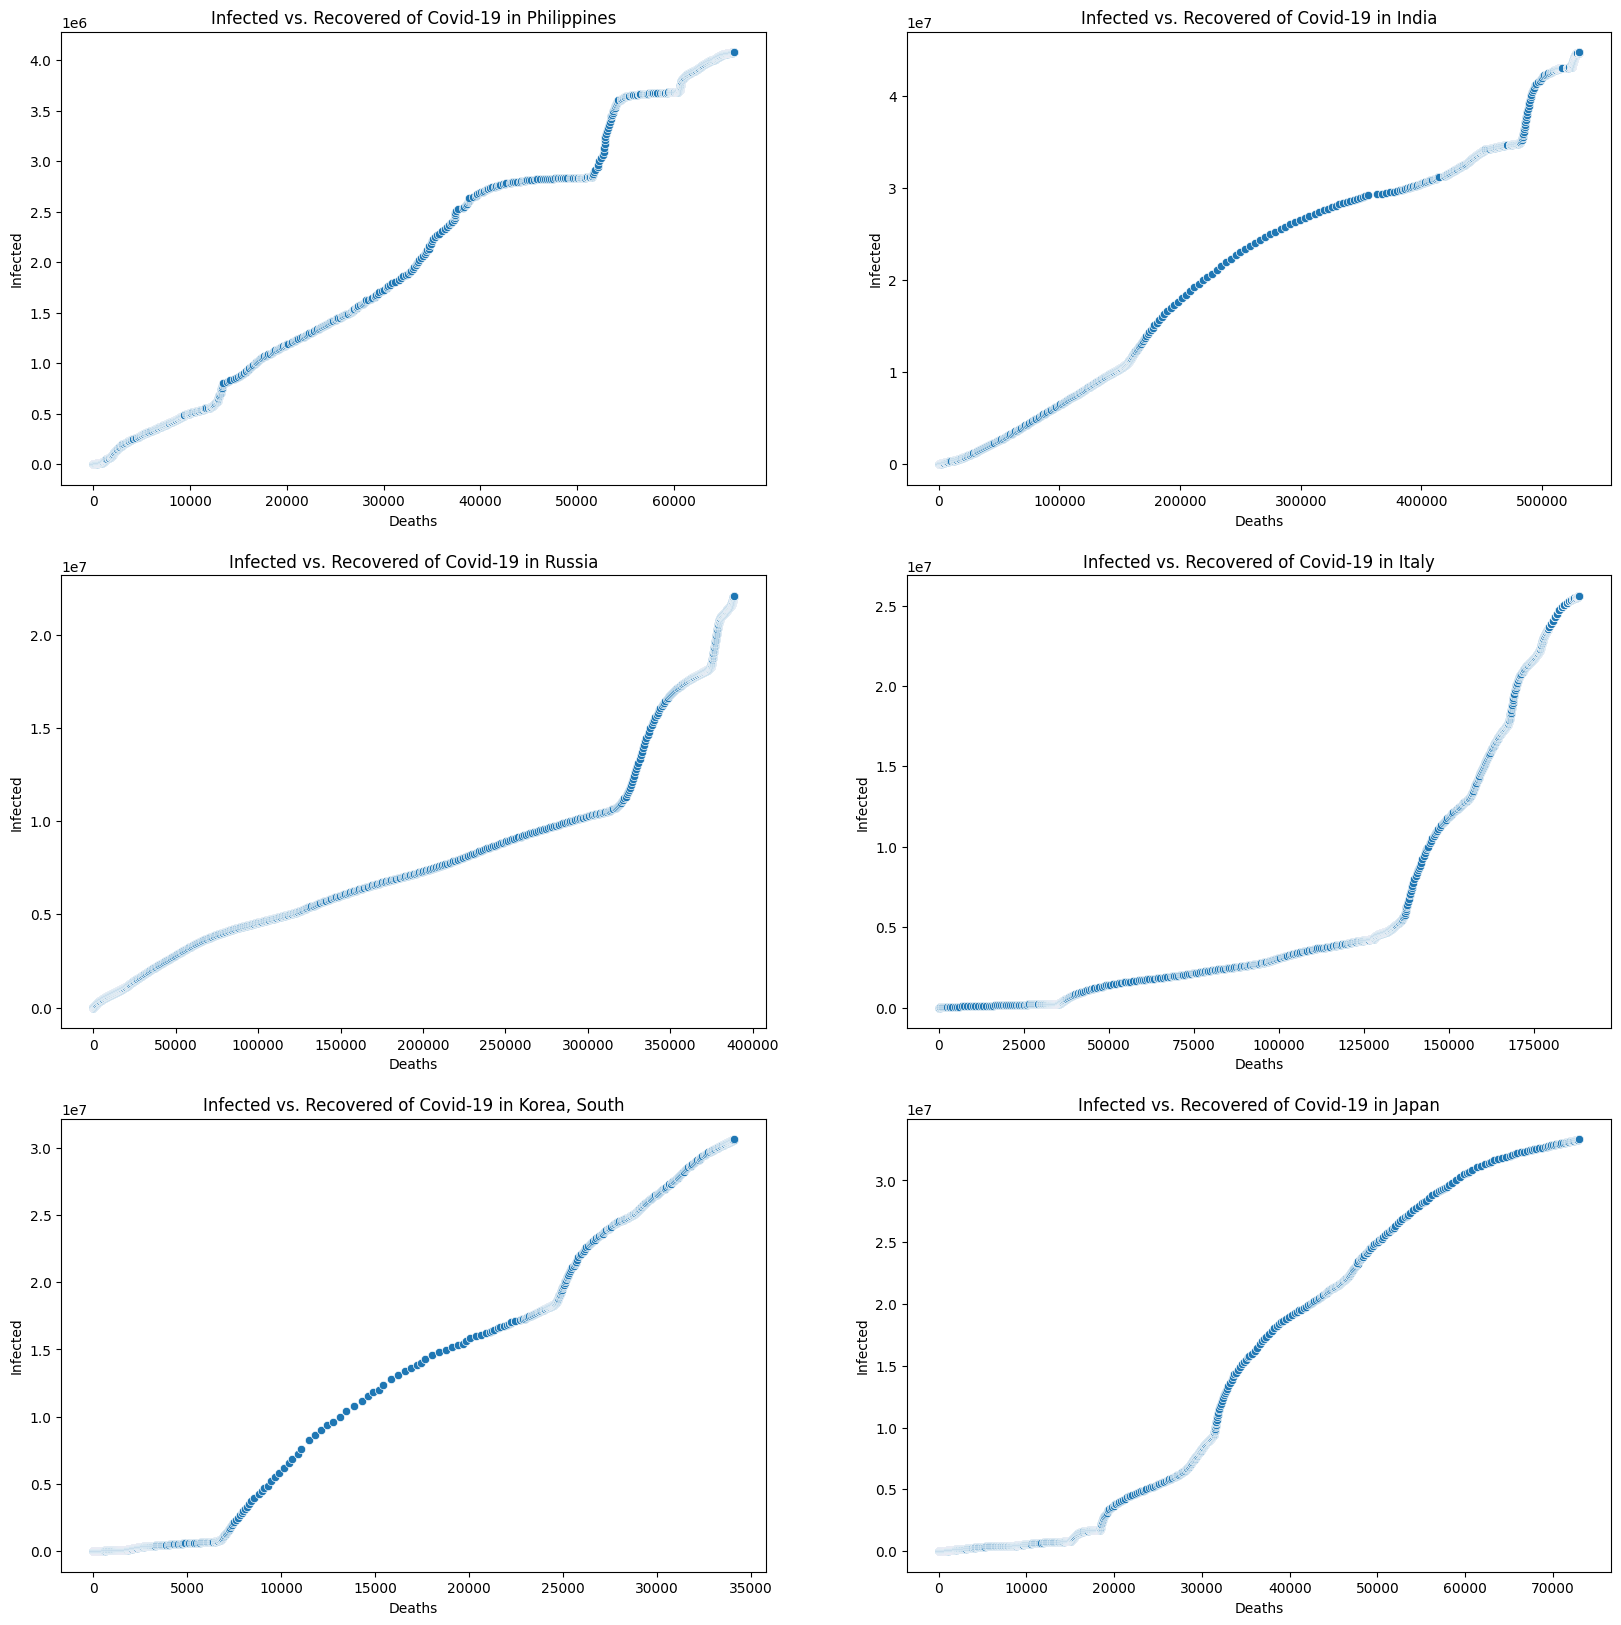

In [115]:
fig, axs = plt.subplots(3, 2, figsize = (20,20))
print("Graph of deaths vs. infected data from the 6 countries and their respective correlation")
for country in analyze_countries:
    df = mkframe(country)
    ax = axs[analyze_countries.index(country) // 2, analyze_countries.index(country) % 2]
    sns.scatterplot(data=df, x="deaths", y="infected", ax = ax)
    
    ax.set_title(f"Infected vs. Recovered of Covid-19 in {country}")
    ax.set_xlabel("Deaths")
    ax.set_ylabel("Infected")
    print(f"Correlation for {country}: {df['infected'].corr(df['deaths'])}")

plt.plot()

In [116]:
#it would be intuitive to now use a dataframe for each country and then attach the fatality rate to the dataframe
df_japan = mkframe('Japan')
df_phil = mkframe('Philippines')
df_india = mkframe('India')
df_russia = mkframe('Russia')
df_italy = mkframe('Italy')
df_korea = mkframe('Korea, South')

In [117]:
df_japan

,infected,recovered,deaths
NaT,0,0,0
2020-01-22,2,0,0
2020-01-23,2,0,0
2020-01-24,2,0,0
2020-01-25,2,0,0
...,...,...,...
2023-03-05,33282370,0,72779
2023-03-06,33286633,0,72813
2023-03-07,33298799,0,72848
2023-03-08,33310604,0,72917


In [118]:
fatality_rate = []
time = []
for i in range(len(df_japan)-14):
    if df_japan.iloc[i+14]['infected'] == 0:
        fatality_rate.append(0)
    else:
        fatality_rate.append(df_japan.iloc[i+14]['deaths']/df_japan.iloc[i+14]['infected'])
    time.append(df.index[i])

In [119]:
df_fatality = pd.DataFrame({'fatality_rate' : fatality_rate}, index = time)

In [120]:
def attach_fatality_rate(df):
    fatality_rate = []
    time = []
    for i in range(len(df)):
        if i >= len(df)-14:
            fatality_rate.append(np.nan)  #Since we are using the total number of infected 14 days before the specific date of the number of deaths. We use nan.
            continue
        if df.iloc[i]['infected'] == 0:
            fatality_rate.append(0)
        else:
            fatality_rate.append(df.iloc[i]['deaths']/df.iloc[i+14]['infected'])
        time.append(df.index[i])
    df['fatality_rate'] = fatality_rate
    #df['fatality_rate'] = df['fatality_rate'].replace(np.inf,np.nan).fillna(method='pad')
    #df['fatality_rate'] = df['fatality_rate'].replace(np.nan,0)
    return df

In [121]:
df_japan = attach_fatality_rate(df_japan)
df_phil = attach_fatality_rate(df_phil)
df_india = attach_fatality_rate(df_india)
df_russia = attach_fatality_rate(df_russia)
df_italy = attach_fatality_rate(df_italy)
df_korea = attach_fatality_rate(df_korea)

In [125]:
#check the tail
df_japan.tail()

,infected,recovered,deaths,fatality_rate
2023-03-05,33282370,0,72779,NaN
2023-03-06,33286633,0,72813,NaN
2023-03-07,33298799,0,72848,NaN
2023-03-08,33310604,0,72917,NaN
2023-03-09,33320438,0,72997,NaN


In [123]:
#check the head
df_japan.head()

,infected,recovered,deaths,fatality_rate
NaT,0,0,0,0.0
2020-01-22,2,0,0,0.0
2020-01-23,2,0,0,0.0
2020-01-24,2,0,0,0.0
2020-01-25,2,0,0,0.0


Correlation for Japan: -0.5199869630664191
Correlation for Philippines: -0.2136579629339591
Correlation for India: 0.08482657100804905
Correlation for Russia: 0.4141847681532185
Correlation for Italy: -0.5706375475584602
Correlation for South Korea: -0.6989468070241256


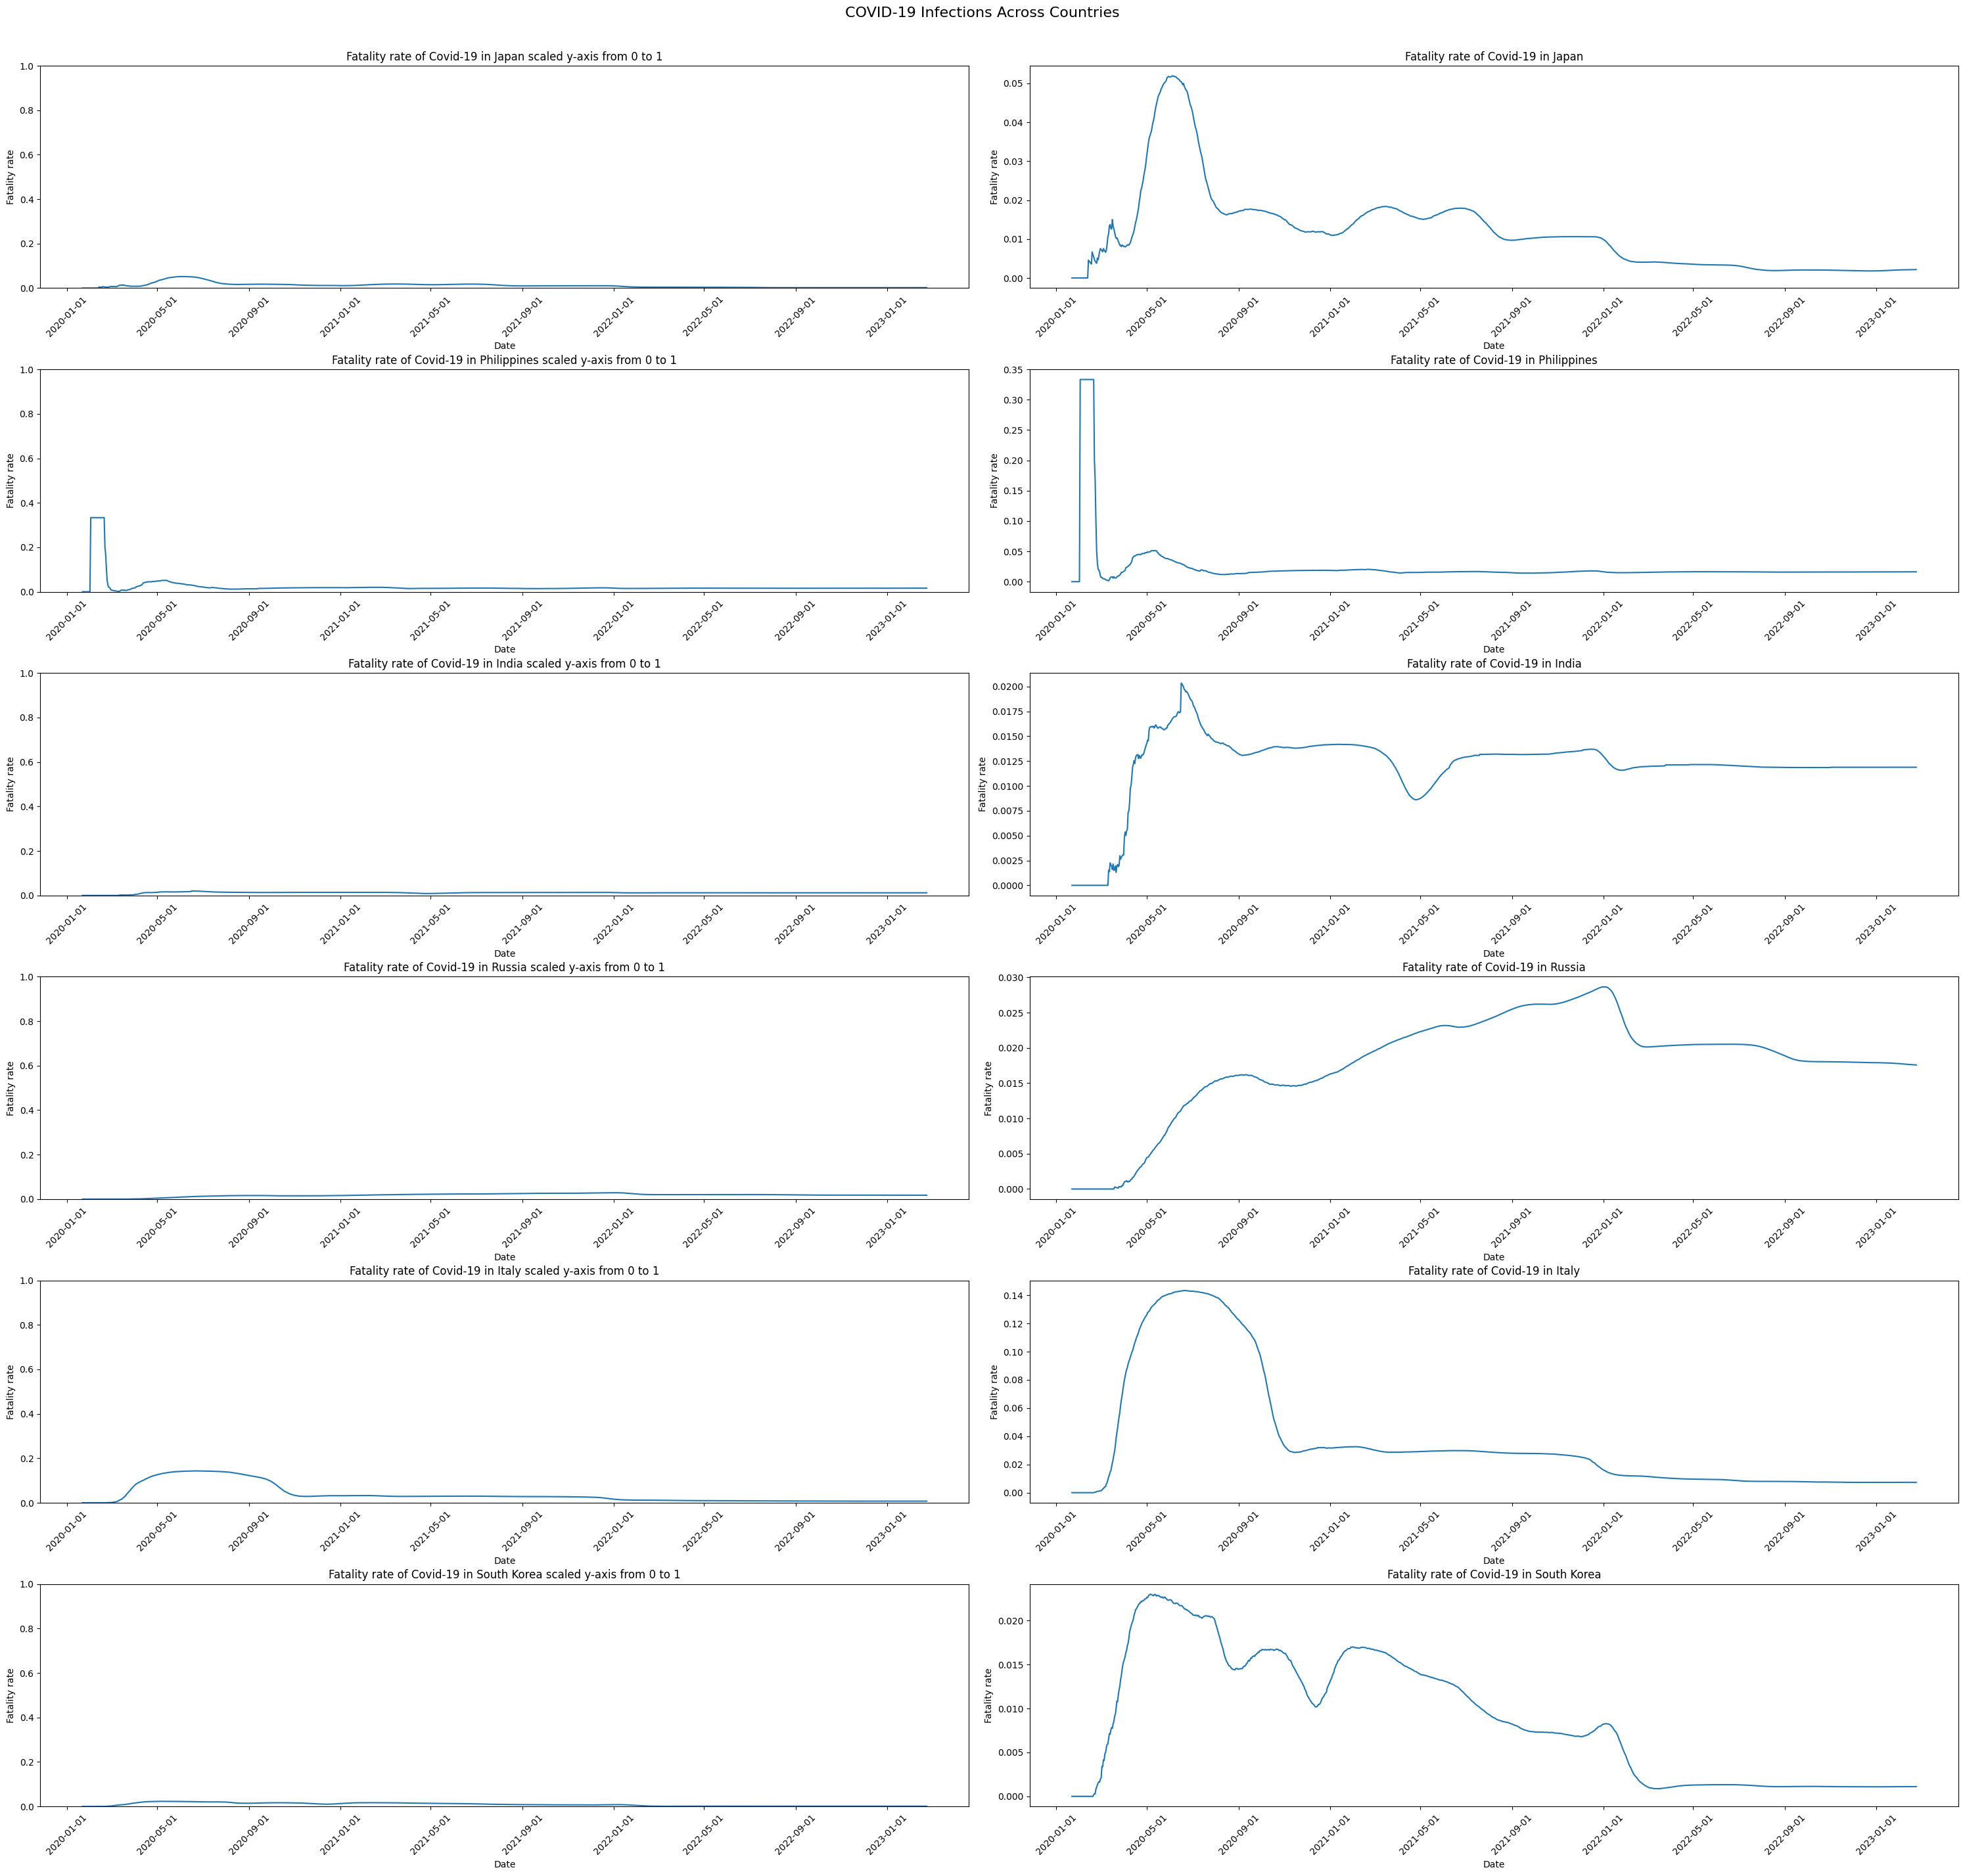

In [126]:
import matplotlib.dates as mdates
fatality_rate_countries = [df_japan, df_phil, df_india, df_russia, df_italy, df_korea]
country_names = ['Japan', 'Philippines', 'India', 'Russia', 'Italy', 'South Korea']

fig, axs = plt.subplots(6, 2, figsize=(30,30))

for i, (df, country) in enumerate(zip(fatality_rate_countries, country_names)):
    ax1 = axs[i, 0]
    ax1.plot(df.index, df['fatality_rate'])
    
    ax1.set_title(f"Fatality rate of Covid-19 in {country} scaled y-axis from 0 to 1")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Fatality rate")
    
    # Rotate x-axis labels for better readability
    ax1.tick_params(axis='x', rotation=45)
    
    # Format x-axis to show dates nicely
    ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    
    #Set y range from 0 to 1 so that it will be uniform throught the different countries and to avoid confusion
    ax1.set_ylim(0,1)
    print(f"Correlation for {country}: {df['infected'].corr(df['fatality_rate'])}")
    
    #Create another plot, this time with the y-axis scaled to minimum and maximum values of the fatality rate
    ax2 = axs[i, 1]
    ax2.plot(df.index, df['fatality_rate'])
    
    ax2.set_title(f"Fatality rate of Covid-19 in {country}")
    ax2.set_xlabel("Date")
    ax2.set_ylabel("Fatality rate")
    
    # Rotate x-axis labels for better readability
    ax2.tick_params(axis='x', rotation=45)
    
    # Format x-axis to show dates nicely
    ax2.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    
plt.tight_layout()
fig.suptitle("COVID-19 Infections Across Countries", fontsize=16, y=0.95)
plt.subplots_adjust(top=0.92)
plt.show()

We have two plots of fatality rate over time for each country, side by side, having individual rows. The first columns show the fatality rate over time for each country, with fatality rate scaled from 0 to 1. On the other hand, the second column has a fatality rate scaled from the minimum value to the maximum value. This is to avoid confusion about the trend of fatality rate and it's corresponding value. 
We can see that the fatality rate are relatively low for all of the analyzed countries, with Italy, Japan, India, South Korea, and Russia having fatality rates below 0.1.
Aside from Russia, fatality rate spiked around May of 2020, and the numbers dwindled soon after that.
Comparing the two plots of the fatality rate over time for Russia, although the second plot shows an increasing fatality rate, take note of the value and the scale of the y-axis. The fatality rate over time for Russia is observed to be very low, as evident by the first plot